In [8]:
import copy
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

AUTHOR_PATH = '../data/cmavergames/'

In [3]:
def read_jsonl(path):
    """Parse jsonl to list of dicts"""
    with open(path) as f:
        lines = f.readlines()
    return [json.loads(line) for line in lines]


def get_signatures(ap_results):
    """Given the author profile results get all signatures"""
    signatures = []
    for profile in ap_results:
        signatures += profile['signatureIds']
    return signatures


def fill_dmatrix(distances, signature_list):
    """Given distances jsonl and list of signatures fill the distance matrix"""
    dmatrix = np.zeros(shape=(len(signature_list), len(signature_list)))

    signature_to_idx = {
        signature: idx for idx, signature in enumerate(signature_list)
    }

    for distance in distances:
        sig1 = distance['signatureId1']
        sig2 = distance['signatureId2']
        d = distance['distance']
        row = signature_to_idx[sig1]
        column = signature_to_idx[sig2]
        dmatrix[row, column] = d

    dmatrix = dmatrix.T + dmatrix # Transpose to fill symetric elements
    return dmatrix, signature_to_idx


def get_features(sig_id, features):
    """Retrieve all feature vectors realated to the given signature"""
    feature_vectors = []
    for feature_entry in features:
        if feature_entry['signatureId1'] == sig_id or feature_entry['signatureId2'] == sig_id:
            feature_vectors.append(feature_entry['features'])
    return feature_vectors

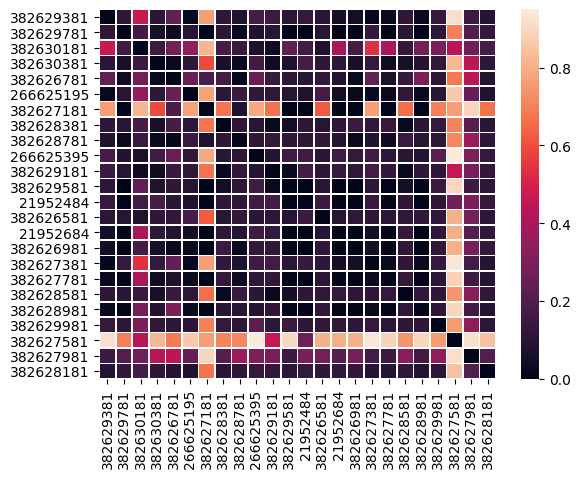

In [4]:
ap_results = read_jsonl(path=os.path.join(AUTHOR_PATH, 'results.json'))
distances = read_jsonl(path=os.path.join(AUTHOR_PATH, 'distances.json'))
signatures = get_signatures(ap_results)
dmatrix, signature_to_idx = fill_dmatrix(distances, signatures)

sns.heatmap(dmatrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

In [34]:
clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='average'
)
profiles = clusterer.fit_predict(dmatrix)
print(f'Created {len(np.unique(profiles))} profiles')

Created 2 profiles


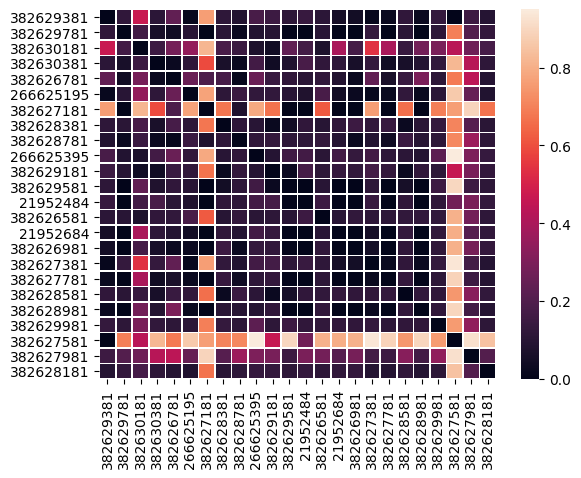

Created 1 profiles


In [35]:
modified_matrix = copy.deepcopy(dmatrix)
modified_matrix[-3, 0] = 0
modified_matrix[0, -3] = 0

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='average'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')

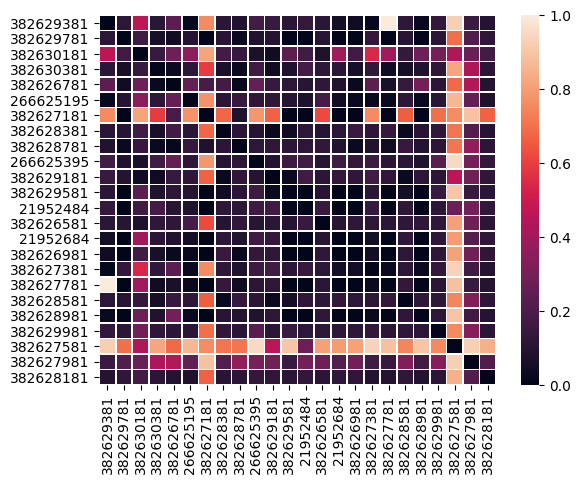

Created 2 profiles


In [36]:
modified_matrix = copy.deepcopy(dmatrix)
modified_matrix[17, 0] = 1
modified_matrix[0, 17] = 1

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='average'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')

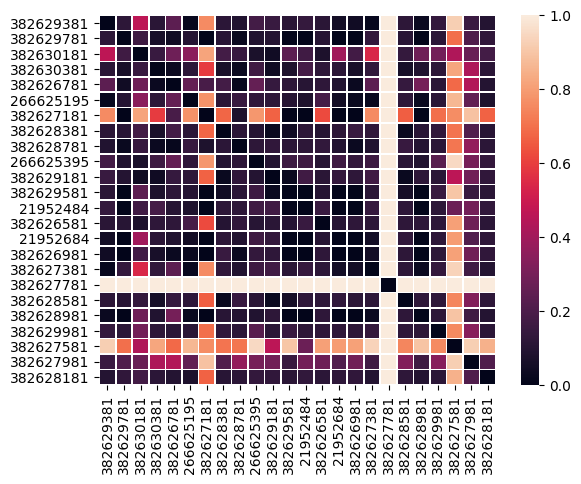

Created 3 profiles


In [37]:
modified_matrix = copy.deepcopy(dmatrix)
modified_matrix[17, :17] = 1
modified_matrix[:17, 17] = 1
modified_matrix[17, 18:] = 1
modified_matrix[18:, 17] = 1

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='average'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')

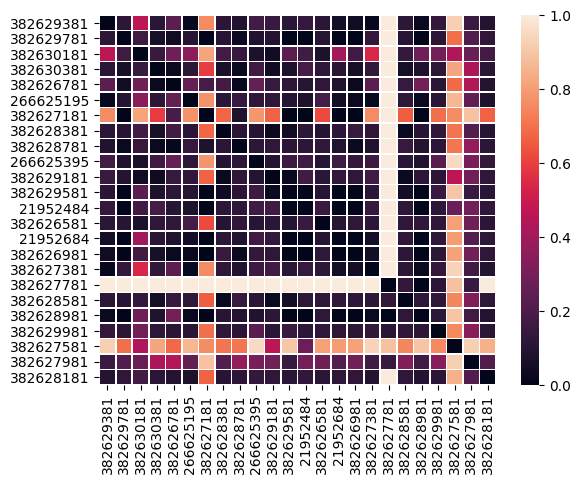

Created 2 profiles


In [38]:
modified_matrix = copy.deepcopy(dmatrix)
modified_matrix[17, :17] = 1
modified_matrix[:17, 17] = 1
modified_matrix[17, 23:] = 1
modified_matrix[23:, 17] = 1

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='average'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')

### Experiment with single linkage

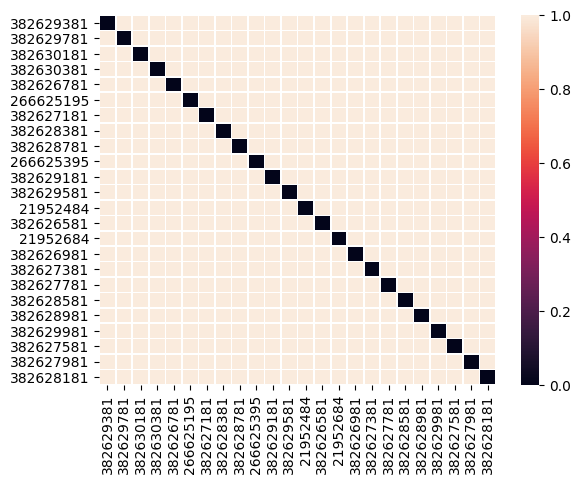

Created 24 profiles


In [42]:
modified_matrix = np.ones((24, 24))
modified_matrix[np.diag_indices(n=24)] = 0

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='single'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')

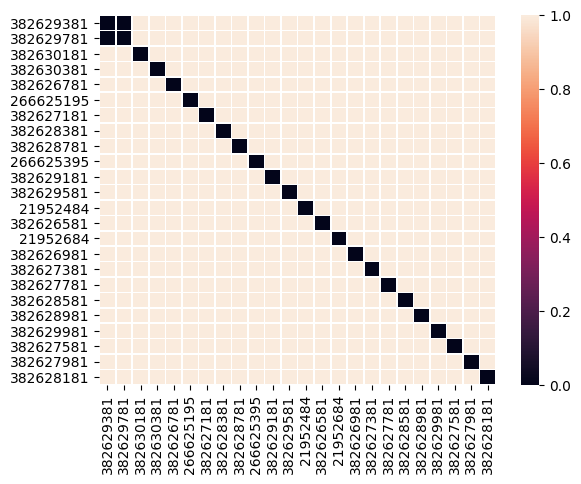

Created 23 profiles


In [44]:
modified_matrix = np.ones((24, 24))
modified_matrix[np.diag_indices(n=24)] = 0
modified_matrix[0, 1] = 0
modified_matrix[1, 0] = 0

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='single'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')

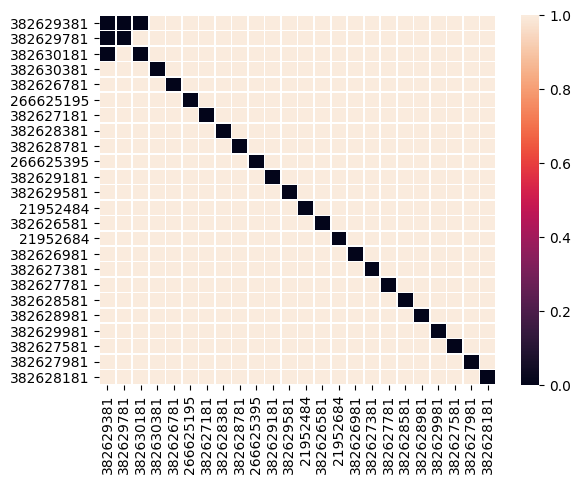

Created 22 profiles


In [45]:
modified_matrix = np.ones((24, 24))
modified_matrix[np.diag_indices(n=24)] = 0
modified_matrix[0, 1:3] = 0
modified_matrix[1:3, 0] = 0

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='single'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')

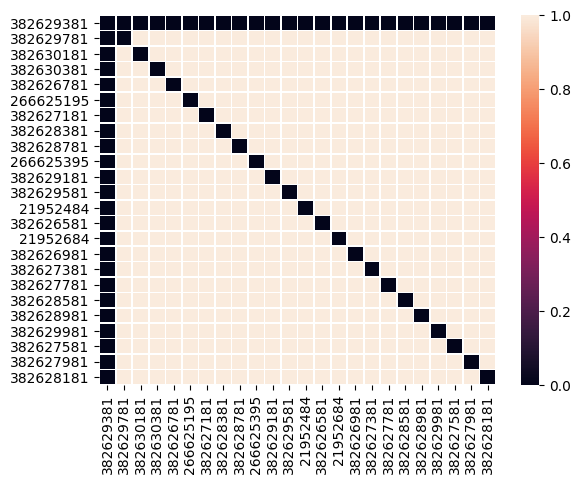

Created 1 profiles


In [46]:
modified_matrix = np.ones((24, 24))
modified_matrix[np.diag_indices(n=24)] = 0
modified_matrix[0, :] = 0
modified_matrix[:, 0] = 0

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='single'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')

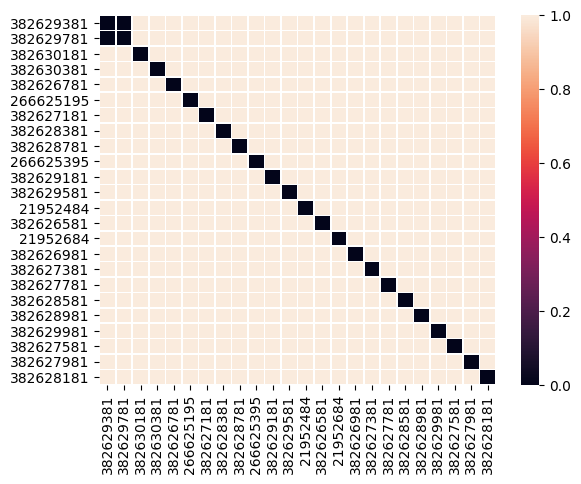

Created 23 profiles


In [47]:
modified_matrix = np.ones((24, 24))
modified_matrix[np.diag_indices(n=24)] = 0
modified_matrix[0, 1] = 0
modified_matrix[1, 0] = 0

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='average'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')

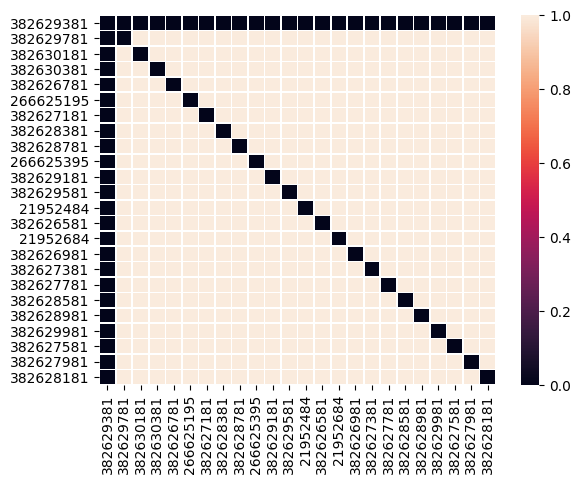

Created 22 profiles


In [48]:
modified_matrix = np.ones((24, 24))
modified_matrix[np.diag_indices(n=24)] = 0
modified_matrix[0, :] = 0
modified_matrix[:, 0] = 0

sns.heatmap(modified_matrix, linewidths=0.5, xticklabels=signatures, yticklabels=signatures)
plt.show()

clusterer = AgglomerativeClustering(
                n_clusters=None,
                affinity='precomputed',
                distance_threshold=0.52502,
                linkage='average'
)
profiles = clusterer.fit_predict(modified_matrix)
print(f'Created {len(np.unique(profiles))} profiles')